In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
ss= pd.read_csv("C:/Users/vipin/OneDrive/Documents/Desktop/Project5/Notebook/cleaned_data.csv")

In [3]:
# Compute Engagement Metrics
engagement_metrics = ss.groupby('MSISDN/Number').agg({
    'Dur. (ms)': ['count', 'sum'],  
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

engagement_metrics.columns = ['MSISDN/Number', 'Session Frequency', 'Total Duration', 'Total DL', 'Total UL']

In [4]:
# Compute Experience Metrics
experience_metrics = ss.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'sum',
    'TCP UL Retrans. Vol (Bytes)': 'sum',
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Handset Type': lambda x: x.mode().iloc[0],
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean'
}).reset_index()

In [5]:
# Merge Engagement and Experience Metrics
satisfaction_analysis = pd.merge(engagement_metrics, experience_metrics, on='MSISDN/Number')
satisfaction_analysis

,MSISDN/Number,Session Frequency,Total Duration,Total DL,Total UL,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,0.000000e+00,1,0.059161,0.936278,0.428615,1.331761e-04,0.000007,0.000475,0.000000,Huawei P20 Lite Huawei Nova 3E,0.000098,0.000665
1,1.693162e-07,1,0.093990,0.127345,0.429309,1.331761e-04,0.000007,0.000310,0.000140,Apple iPhone 7 (A1778),0.000127,0.000870
2,3.232881e-05,1,0.023073,0.442497,0.216086,2.477631e-07,0.000007,0.000712,0.002107,Apple iPhone 5S (A1457),0.000539,0.000751
3,3.648235e-05,2,0.012321,1.511565,1.156914,2.310331e-03,0.000015,0.000588,0.000351,Apple iPhone Se (A1723),0.053410,0.140319
4,4.740853e-05,1,0.065299,0.157292,0.575054,6.422279e-07,0.000007,0.000217,0.000421,Samsung Galaxy A8 (2018),0.019735,0.005528
...,...,...,...,...,...,...,...,...,...,...,...,...
88446,9.997801e-01,1,0.049500,0.659746,0.615941,1.331761e-04,0.000007,0.000547,0.000562,Apple iPhone 8 (A1905),0.000111,0.000802
88447,9.998406e-01,1,0.082777,0.187074,0.401769,1.331761e-04,0.000007,0.000495,0.000702,Apple iPhone 6S (A1688),0.000061,0.000751
88448,9.999103e-01,1,0.013347,0.358583,0.543405,3.166896e-08,0.000003,0.000598,0.001545,undefined,0.417146,0.089349
88449,9.999943e-01,1,0.000901,0.762909,0.302431,5.007468e-05,0.000001,0.000433,0.001404,Huawei Honor 9 Lite,0.026386,0.006603


In [6]:
satisfaction_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88451 entries, 0 to 88450
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MSISDN/Number                88451 non-null  float64
 1   Session Frequency            88451 non-null  int64  
 2   Total Duration               88451 non-null  float64
 3   Total DL                     88451 non-null  float64
 4   Total UL                     88451 non-null  float64
 5   TCP DL Retrans. Vol (Bytes)  88451 non-null  float64
 6   TCP UL Retrans. Vol (Bytes)  88451 non-null  float64
 7   Avg RTT DL (ms)              88451 non-null  float64
 8   Avg RTT UL (ms)              88451 non-null  float64
 9   Handset Type                 88451 non-null  object 
 10  Avg Bearer TP DL (kbps)      88451 non-null  float64
 11  Avg Bearer TP UL (kbps)      88451 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 8.1+ MB


In [7]:
print(satisfaction_analysis.isnull().sum())

MSISDN/Number                  0
Session Frequency              0
Total Duration                 0
Total DL                       0
Total UL                       0
TCP DL Retrans. Vol (Bytes)    0
TCP UL Retrans. Vol (Bytes)    0
Avg RTT DL (ms)                0
Avg RTT UL (ms)                0
Handset Type                   0
Avg Bearer TP DL (kbps)        0
Avg Bearer TP UL (kbps)        0
dtype: int64


# Task 4.1 - Compute Engagement and Experience Scores

In [8]:
def new_features(ss):
    cols = ['MSISDN/Number', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
            'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']
    ss['TCP Retransmission'] = ss[cols[5]] + ss[cols[6]]
    ss['RTT'] = ss[cols[1]] + ss[cols[2]]
    ss['Throughput'] = ss[cols[3]] + ss[cols[4]]
    return ss

In [9]:
dt = new_features(ss)
dt['TCP Retransmission'] = dt['TCP Retransmission'].fillna(dt['TCP Retransmission'].mean())
dt['RTT'] = dt['RTT'].fillna(dt['RTT'].mean())
dt['Throughput'] = dt['Throughput'].fillna(dt['Throughput'].mean())
dt['Handset Type'] = dt['Handset Type'].fillna(dt['Handset Type'].mode()[0])

In [10]:
aggregate = {'Handset Type': 'first', 'TCP Retransmission': 'sum', 'Throughput': 'sum', 'RTT': 'sum'}
dt = dt.groupby('MSISDN/Number').agg(aggregate).reset_index()
customer_agg = dt.groupby('MSISDN/Number').agg({
    'TCP Retransmission': 'mean',
    'RTT': 'mean',
    'Throughput': 'mean',
    'Handset Type': lambda x: x.mode()[0]
}).reset_index()

In [11]:
# Define distance functions
def compute_engagement_score(user_data, centroid):
    return euclidean_distances([user_data], [centroid])[0][0]

In [12]:
def compute_experience_score(user_data, centroid):
    return euclidean_distances([user_data], [centroid])[0][0]

In [13]:
KMeans

sklearn.cluster._kmeans.KMeans

In [14]:
# K-Means Clustering for Engagement Metrics

kmeans_engagement = KMeans(n_clusters=3, random_state=42).fit(customer_agg[['TCP Retransmission', 'RTT', 'Throughput']])
engagement_centroids = kmeans_engagement.cluster_centers_
least_engaged_cluster = np.argmin(np.sum(engagement_centroids, axis=1))  # Index of least engaged cluster
least_engaged_centroid = engagement_centroids[least_engaged_cluster]

In [15]:
customer_agg['Engagement Score'] = customer_agg.apply(
    lambda row: compute_engagement_score(
        [row['TCP Retransmission'], row['RTT'], row['Throughput']], 
        least_engaged_centroid
    ),
    axis=1
)

In [16]:
# K-Means Clustering for Experience Metrics
kmeans_experience = KMeans(n_clusters=3, random_state=42).fit(customer_agg[['TCP Retransmission', 'RTT', 'Throughput']])
experience_centroids = kmeans_experience.cluster_centers_
worst_experience_cluster = np.argmax(np.sum(experience_centroids, axis=1))  # Index of worst experience cluster
worst_experience_centroid = experience_centroids[worst_experience_cluster]

In [17]:
customer_agg['Experience Score'] = customer_agg.apply(
    lambda row: compute_experience_score(
        [row['TCP Retransmission'], row['RTT'], row['Throughput']], 
        worst_experience_centroid
    ),
    axis=1
)

# # Task 4.2 - Calculate Satisfaction Score

In [18]:
customer_agg['Satisfaction Score'] = (customer_agg['Engagement Score'] + customer_agg['Experience Score']) / 2

In [19]:
# Report top 10 satisfied customers
top_10_satisfied = customer_agg.nlargest(10, 'Satisfaction Score')
print("Top 10 Satisfied Customers:")
print(top_10_satisfied[['MSISDN/Number', 'Satisfaction Score']])

Top 10 Satisfied Customers:
       MSISDN/Number  Satisfaction Score
35218       0.317340           36.901980
59042       0.360074           36.857228
39920       0.324427           36.832229
30988       0.310996           36.829879
28227       0.307322           36.818078
26381       0.304964           36.770763
71228       0.516278           36.763696
82704       0.860183           36.762306
42955       0.328998           36.761747
48261       0.338132           36.751183


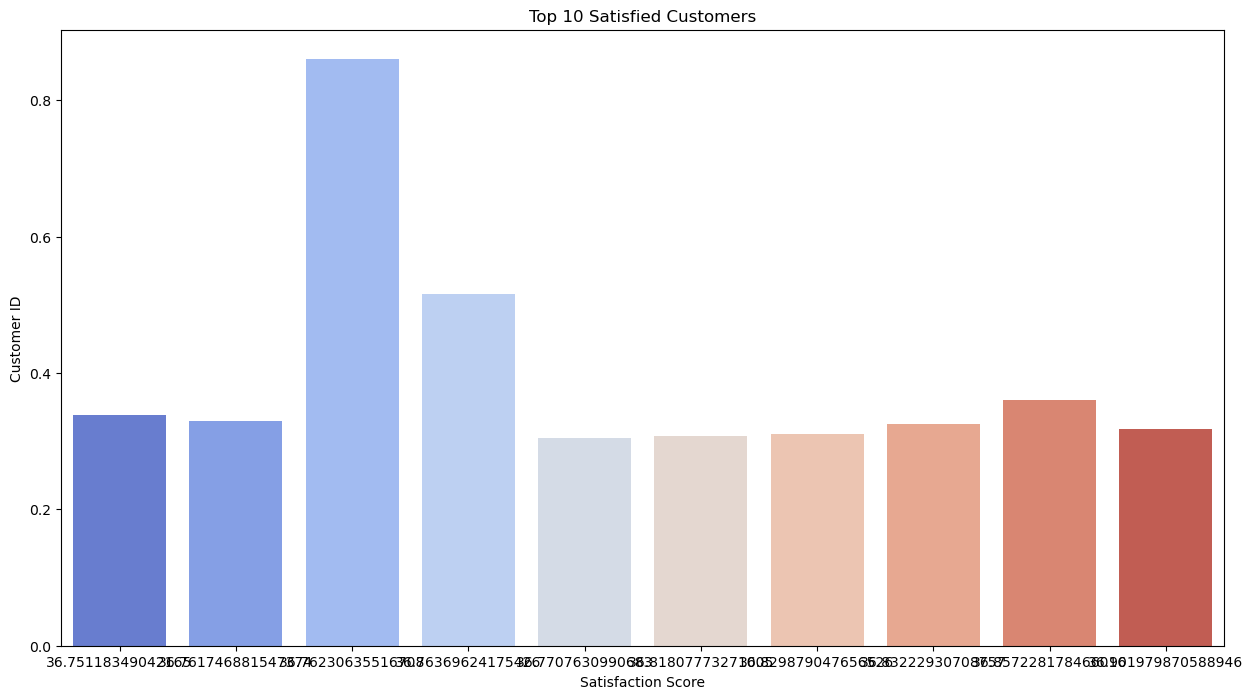

In [20]:
# Plot top 10 satisfied customers
plt.figure(figsize=(15,8))
sns.barplot(
    x='Satisfaction Score',
    y='MSISDN/Number',
    data=top_10_satisfied,
    palette='coolwarm'
)
plt.title('Top 10 Satisfied Customers')
plt.xlabel('Satisfaction Score')
plt.ylabel('Customer ID')
plt.show()

# Task 4.3 - Build a Regression Model

In [21]:
features = customer_agg[['TCP Retransmission', 'RTT', 'Throughput']]
target = customer_agg['Satisfaction Score']

In [22]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [23]:
# Build and train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Mean Squared Error: 0.0005378934185124816
Model Coefficients: [ 0.25960316  0.46931756 -0.05071706]
Intercept: 36.35952362463324


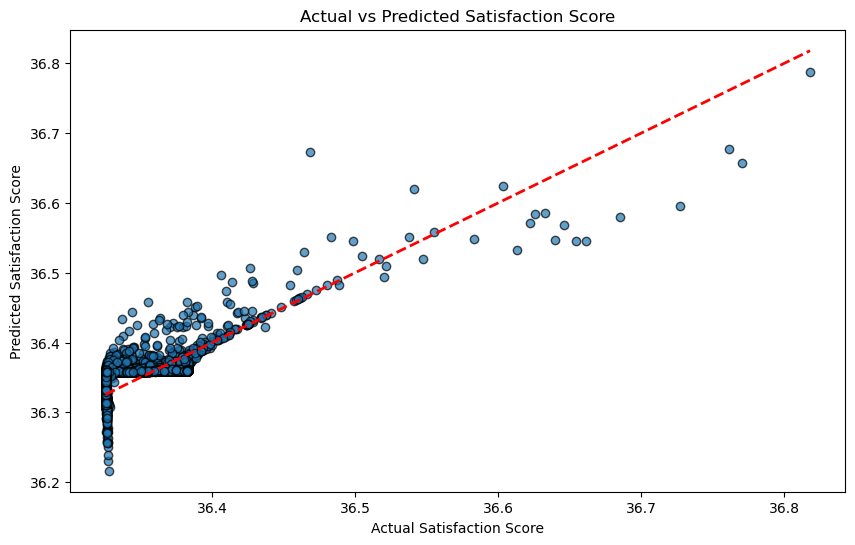

In [25]:
#Plot actual vs predicted values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Satisfaction Score')
plt.xlabel('Actual Satisfaction Score')
plt.ylabel('Predicted Satisfaction Score')
plt.show()

# # Task 4.4 - K-Means Clustering on Engagement and Experience Scores

In [26]:
#K-Means Clustering on Engagement and Experience Scores

eng_exp_scores = customer_agg[['Engagement Score', 'Experience Score']]
kmeans = KMeans(n_clusters=2, random_state=42)
customer_agg['Engagement-Experience Cluster'] = kmeans.fit_predict(eng_exp_scores)

In [27]:
#Report cluster centroids
print("Cluster Centers for Engagement and Experience Scores:")
print(kmeans.cluster_centers_)

Cluster Centers for Engagement and Experience Scores:
[[ 0.11519385 72.59914573]
 [72.65107322  0.        ]]


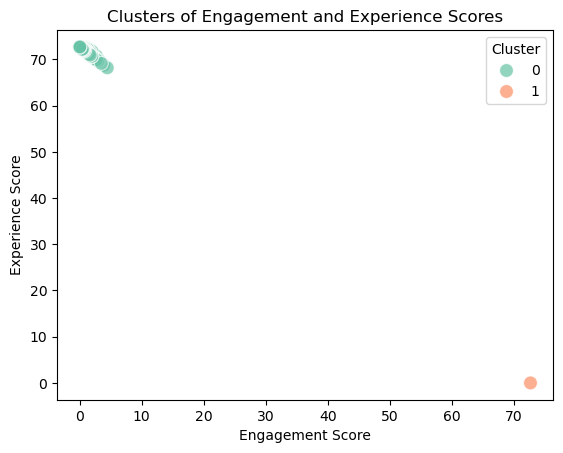

In [28]:
sns.scatterplot(
    x='Engagement Score',
    y='Experience Score',
    hue='Engagement-Experience Cluster',
    palette='Set2',
    data=customer_agg,
    s=100,
    alpha=0.7
)

plt.title('Clusters of Engagement and Experience Scores')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.legend(title='Cluster')
plt.show()

# Task 4.5 - Aggregate Average Satisfaction and Experience Score per Cluster

In [29]:
cluster_agg = customer_agg.groupby('Engagement-Experience Cluster').agg({
    'Satisfaction Score': 'mean',
    'Experience Score': 'mean'
}).reset_index()
print("Cluster Aggregation:")
print(cluster_agg)

Cluster Aggregation:
   Engagement-Experience Cluster  Satisfaction Score  Experience Score
0                              0           36.357170         72.599146
1                              1           36.325537          0.000000


<Figure size 1200x600 with 0 Axes>

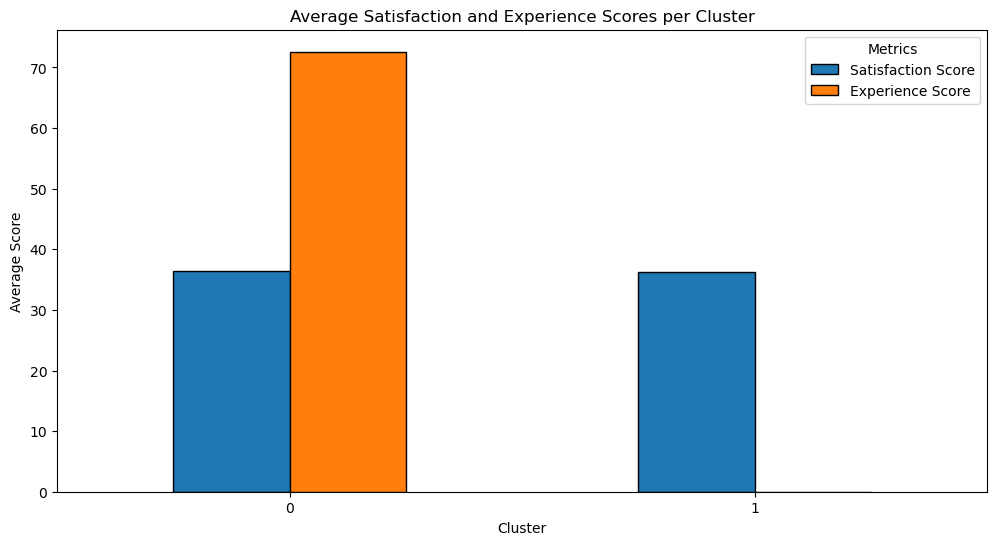

In [30]:
# Plot average satisfaction and experience scores per cluster
plt.figure(figsize=(12, 6))
cluster_agg.plot(kind='bar', x='Engagement-Experience Cluster', y=['Satisfaction Score', 'Experience Score'], 
                 figsize=(12, 6), color=['#1f77b4', '#ff7f0e'], edgecolor='k')
plt.title('Average Satisfaction and Experience Scores per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.show()

In [31]:
# Save to satisfaction_analysis
ss.to_csv('C:/Users/vipin/OneDrive/Documents/Desktop/Project5/Notebook/Satisfaction_analysis.csv',index=False)

Key Insights

1. Customer Segmentation:

High Engagement Cluster: A large cluster indicates a broad base of satisfied customers with high engagement.
Low Engagement and Poor Experience Clusters: Smaller clusters with low engagement and poor experience scores highlight areas needing improvement.

2. Satisfaction Scores:

Top 10 Satisfied Customers: Identified customers with the highest satisfaction scores provide insight into successful attributes and areas for replication.

3. Regression Analysis:

Impact of Metrics: The linear regression model reveals how TCP retransmissions, RTT, and throughput affect satisfaction scores.
Model Performance: Provides Mean Squared Error (MSE), coefficients, and intercept, indicating prediction accuracy and metric significance.

4. Cluster Analysis:

Engagement vs. Experience: Visualization shows how different clusters perform in terms of engagement and experience scores.
Average Scores by Cluster: Highlights performance differences between clusters, showing where satisfaction and experience are highest or lowest.

5. Actionable Recommendations:

Enhance Engagement: Focus on improving engagement for low-scoring clusters through better network performance or customer support.
Improve Experience: Address issues causing high RTT, retransmissions, or low throughput for clusters with poor experience scores.
Replicate Success: Use insights from top satisfied customers to improve services for other customers.